In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pydicom
from skimage import measure, filters
from splitter_of_mice import SoM

ModuleNotFoundError: No module named 'image_classes'

In [37]:
dicom_dir = "./sample-data/dicom/mpet3967b_ct1_v1.ct"

In [38]:
som = SoM(dicom_dir, modality='CT', dicom=True)

In [39]:
SoM.num_anim = 2
SoM.sep_thresh = 0.99
SoM.margin = 30
SoM.minpix = 3300

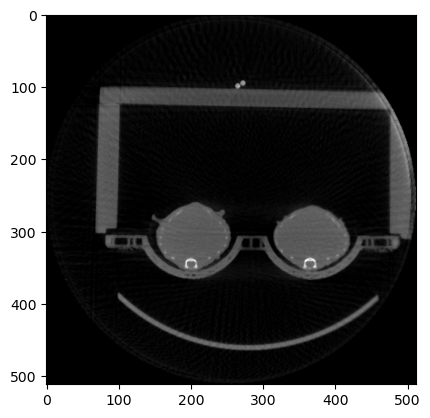

In [40]:
imz = SoM.z_compress_ct(som.pi, None, False)
plt.imshow(imz, cmap='grey')

In [41]:
thresh = filters.threshold_li(imz)
thresh

-31841.81359625815

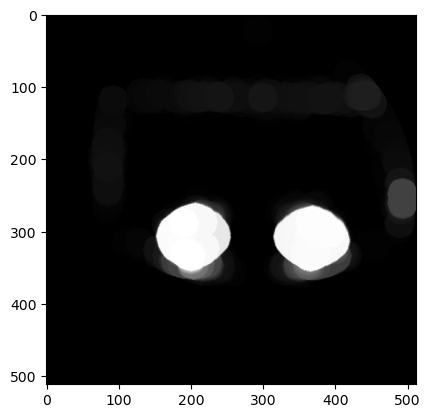

In [42]:
imz_bed_removed = SoM.remove_bed(imz)
plt.imshow(imz_bed_removed, cmap='grey')

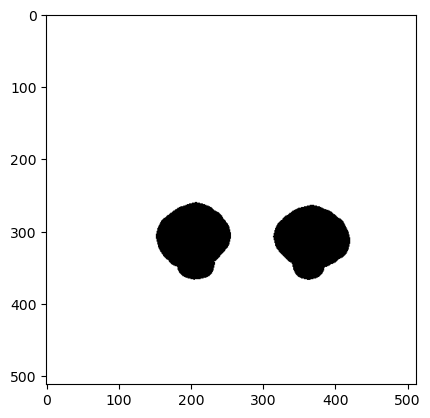

In [43]:
blobs = imz_bed_removed > thresh
(blobs_labels, num) = measure.label(blobs, return_num=True, background=0)
rects = SoM.get_valid_regs(blobs_labels)
plt.imshow(blobs, cmap='binary')


In [44]:
cuts = SoM.split_coords(imz, rects, 1)

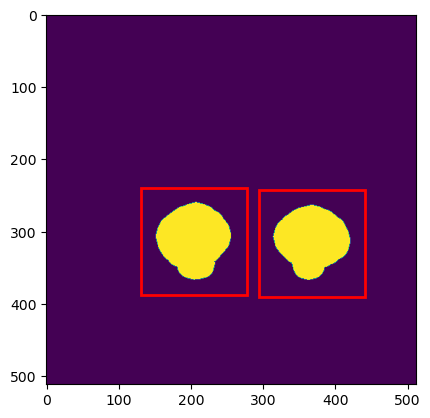

In [45]:
fig, ax = plt.subplots()
ax.imshow(blobs)


for cut in cuts:
    rect = cut['rect']
    
    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = rect.xlt, rect.ylt, rect.xrb, rect.yrb
    rect1 = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect1)

In [46]:
cuts[0]['rect'].xrb


388

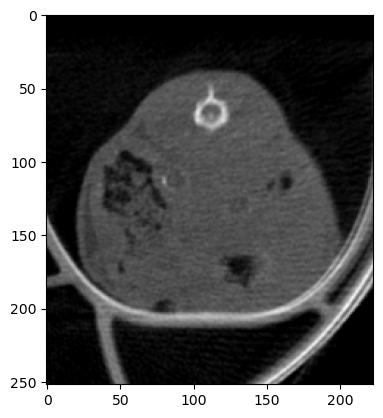

In [83]:
ds = pydicom.dcmread('/Users/andrewl/git/andylassiter/ccdb-micropet-hotel-splitter/splitter_of_mice/output/1/2.25.305628584265007202451240607676643537883.dcm')
plt.imshow(ds.pixel_array, cmap='gray')

In [14]:
import os
import glob
import numpy as np

def load_image_from_dir(directory):
    # Get all the .dcm files in the filepath
    dicom_files = glob.glob(os.path.join(directory, '*.dcm'))

    # Sort dicom files by InstanceNumber
    dicom_files.sort(key=lambda x: pydicom.dcmread(x).InstanceNumber)

    # Load each image file into a single ndarray
    img_data = np.stack([pydicom.dcmread(dicom_file).pixel_array for dicom_file in dicom_files])
    img_data = img_data[..., np.newaxis]
    return dicom_files, img_data

def plot_dicom_images(directory, rows=5, cols=5, invert=False):
    
    # Load dicom files from directory and sort by InstanceNumber
    dicom_files, img_data = load_image_from_dir(directory)

    num_scans = min(rows * cols, len(dicom_files))

    # Calculate the figure size dynamically based on rows and columns
    figsize = (cols * 3, rows * 3)

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.01, hspace=0.01)  # Adjust subplot spacing

    # Plot the images
    for i, j in zip(range(num_scans), np.linspace(0, len(dicom_files) - 1, num=num_scans)):
        ds = pydicom.dcmread(dicom_files[int(j)])

        image = ds.pixel_array
        if invert:
            image = np.max(image) - image  # Invert the image

        row = i // cols
        col = i % cols

        axs[row, col].imshow(image, cmap=plt.cm.gray)
        axs[row, col].axis('off')  # Hide axis labels and ticks

    plt.show()

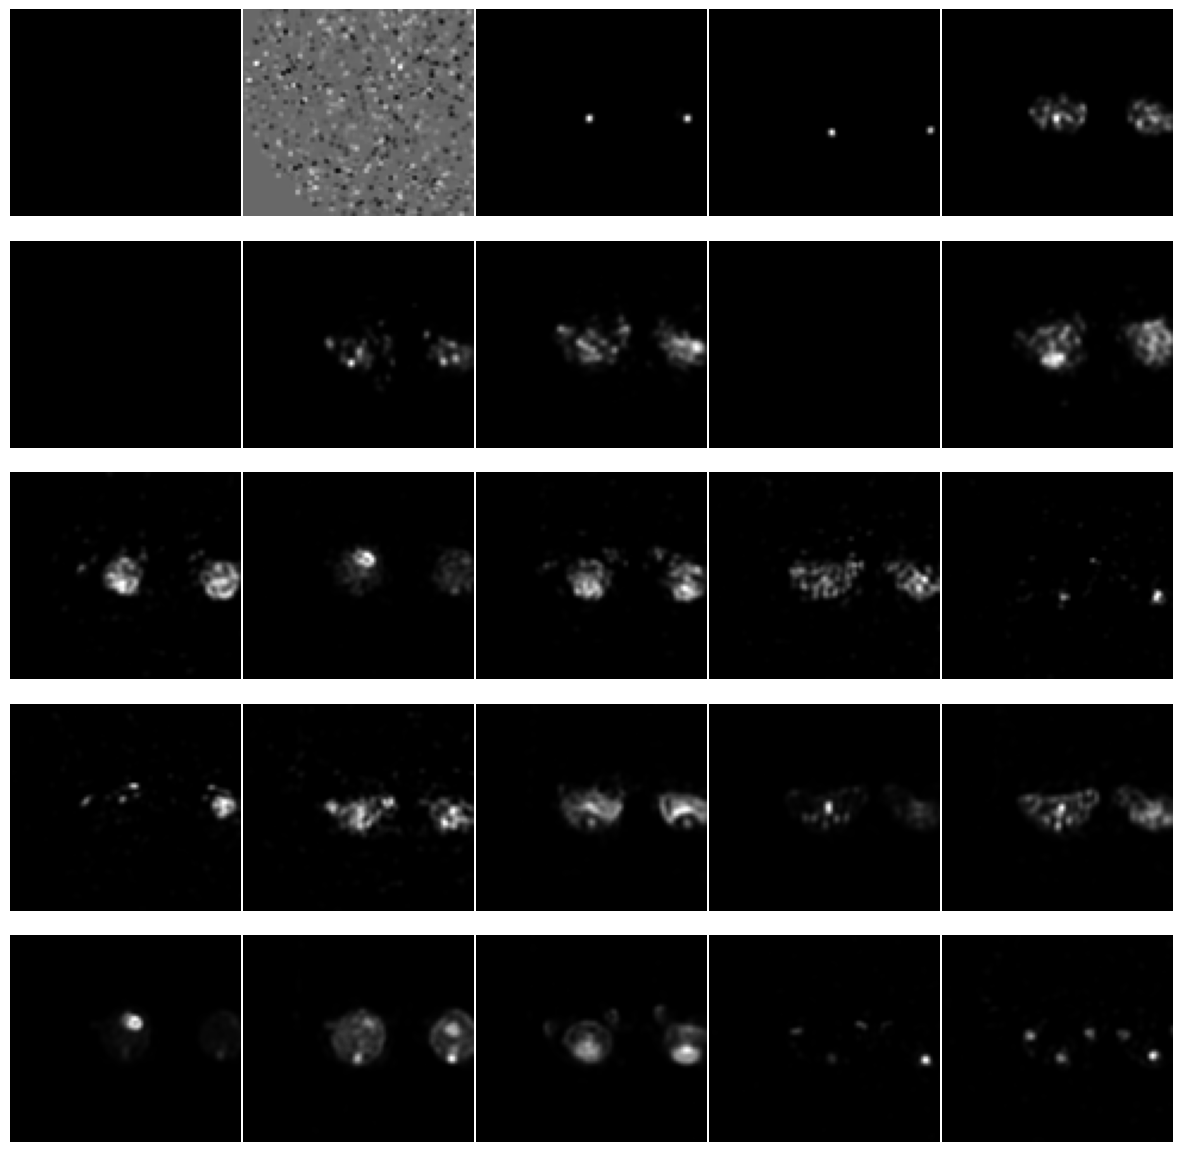

In [15]:
plot_dicom_images('/Users/andrewl/git/andylassiter/ccdb-micropet-hotel-splitter/splitter_of_mice/output_mpet3967b_em1_v1.pet/0')

In [51]:
cuts[0]['rect'].

In [1]:
import glob

In [11]:
glob.glob('/Users/andrewl/git/andylassiter/ccdb-micropet-hotel-splitter/splitter_of_mice/sample-data/dicom/nscan1404a/**/*.dcm', recursive=True)

['/Users/andrewl/git/andylassiter/ccdb-micropet-hotel-splitter/splitter_of_mice/sample-data/dicom/nscan1404a/3/DICOM/1.3.6.1.4.1.12842.1.1.14.3.20231122.111414.997.1767866253-3-122-iv6b0w.dcm',
 '/Users/andrewl/git/andylassiter/ccdb-micropet-hotel-splitter/splitter_of_mice/sample-data/dicom/nscan1404a/3/DICOM/1.3.6.1.4.1.12842.1.1.14.3.20231122.111414.997.1767866253-3-198-1o4v3k4.dcm',
 '/Users/andrewl/git/andylassiter/ccdb-micropet-hotel-splitter/splitter_of_mice/sample-data/dicom/nscan1404a/3/DICOM/1.3.6.1.4.1.12842.1.1.14.3.20231122.111414.997.1767866253-3-161-1ki4sq2.dcm',
 '/Users/andrewl/git/andylassiter/ccdb-micropet-hotel-splitter/splitter_of_mice/sample-data/dicom/nscan1404a/3/DICOM/1.3.6.1.4.1.12842.1.1.14.3.20231122.111414.997.1767866253-3-669-ys2dgb.dcm',
 '/Users/andrewl/git/andylassiter/ccdb-micropet-hotel-splitter/splitter_of_mice/sample-data/dicom/nscan1404a/3/DICOM/1.3.6.1.4.1.12842.1.1.14.3.20231122.111414.997.1767866253-3-693-26i12z.dcm',
 '/Users/andrewl/git/andylas